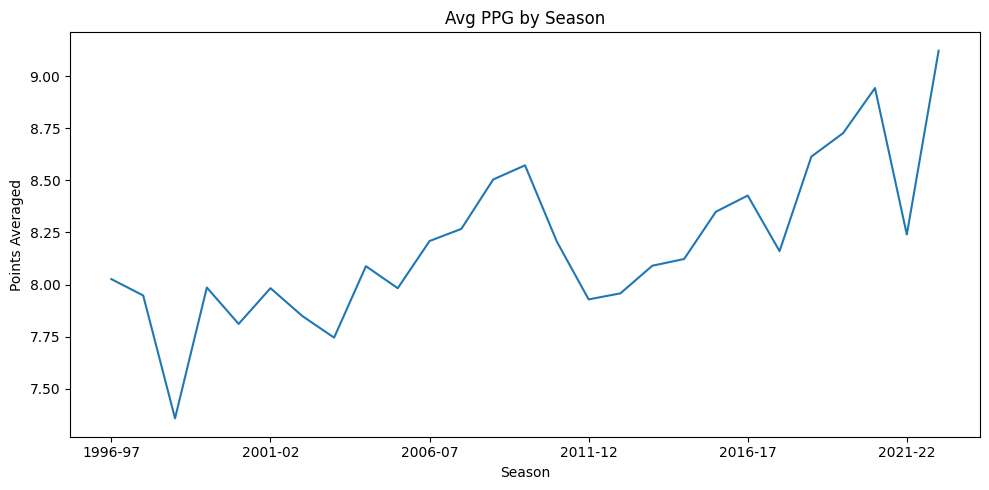

In [1]:
# Average points by season (Graph #1)
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Get csv dataset
nba = pd.read_csv("/kaggle/input/nba-players-data/all_seasons.csv")

avg_ppg_by_season = nba.groupby("season")['pts'].mean()

# Produce line graph
plt.figure(figsize=(10,5))
graph1 = avg_ppg_by_season.plot()
graph1.set_xlabel('Season')
graph1.set_ylabel('Points Averaged')
plt.title("Avg PPG by Season")
plt.tight_layout()

/tmp/ipykernel_13/1277447349.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_per_height = nba.groupby(binned_heights)['pts'].mean()


Text(0.5, 1.0, 'Height vs PPG')

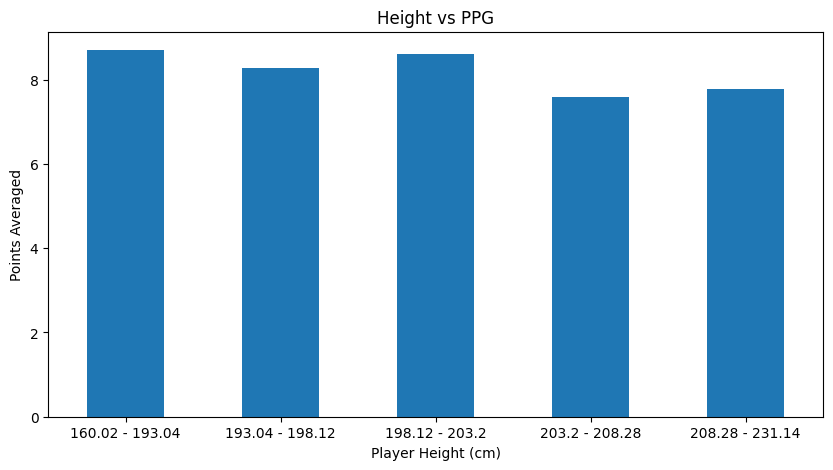

In [2]:
# Average points by height (Graph #2)
avg_ppg_by_height = nba.groupby("player_height")['pts'].mean()

# Split into percentiles of 20 
p0 = nba['player_height'].quantile(0)
p20 = nba['player_height'].quantile(0.2)
p40 = nba['player_height'].quantile(0.4)
p60 = nba['player_height'].quantile(0.6)
p80 = nba['player_height'].quantile(0.8)
p100 = nba['player_height'].quantile(1)

# Categorize players with percentile bins
bin = [p0, p20, p40, p60, p80, p100]
binned_heights = pd.cut(nba['player_height'], bins=bin)
average_per_height = nba.groupby(binned_heights)['pts'].mean()

# Produce bar graph
plt.figure(figsize=(10,5))
graph2 = average_per_height.plot.bar(x=average_per_height.index, y=average_per_height.values)
graph2.set_xlabel('Player Height (cm)')

# Fix tick labels on x-axis
plt.xticks(
    ticks=[0,1,2,3,4], 
    labels=["160.02 - 193.04", "193.04 - 198.12", "198.12 - 203.2", "203.2 - 208.28", "208.28 - 231.14"],
    rotation = 0)

graph2.set_ylabel('Points Averaged')                
plt.title('Height vs PPG')


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


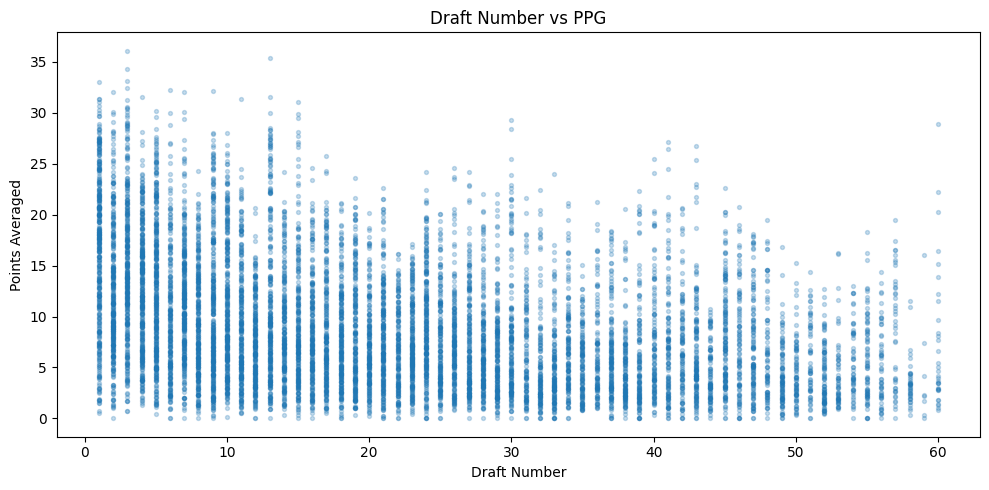

In [3]:
# Average points by draft number (Graph #3)

# Clean column to have no string type draft numbers or unknowns
nba['draft_number'] = nba['draft_number'].replace("Undrafted", np.nan).astype("float")

standardized_draft_number = nba.loc[(nba['draft_number'] <= 60) & (nba['draft_number'] > 0)] # Only want to go up to 60 draft picks (modern)

# Produce scatter plot
plt.figure(figsize=(10,5))
plt.scatter(standardized_draft_number['draft_number'], standardized_draft_number['pts'], alpha=0.25, s=8)
plt.xlabel('Draft Number')
plt.ylabel('Points Averaged')
plt.title('Draft Number vs PPG')
plt.tight_layout()